<a href="https://colab.research.google.com/github/Droslj/scATAC-seq-complete-/blob/Google-colab/scATAC_seq_(1)_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scATAC seq, partly based on scATAC seq processing Galaxy tutorials
(1) scATAC preprocessing
https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-preprocessing-tenx/tutorial.html#mapping-reads-to-a-reference-genome,

(2) Standard scATAC seq processing pipeline
https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-standard-processing-snapatac2/tutorial.html

AD Objects created in Galaxy using customized Galaxy WF with Snapatac2 and imported

Data taken from the following NCBI study:
Metabolic adaptation pilots the differentiation of human hematopoietic cells (https://www.ncbi.nlm.nih.gov/bioproject/PRJNA1015713)
Import Anndata objects for SRR26046013 (cells treated with AOA inhibitor)

Perform following steps:
Part I: Standard pipeline
(1) Import matrices
(2) Compute fragment size distribution
(3) Compute TSS enrichment
(4) Filter cell counts based on TSSe
(5) Create cell by bin matrix based on 500 bp wide bins accross the whole genome
(6) Perform feature selection
(7) Perform Doublet removal
(8) Perform Dim reduction (spectral)
(9) Perform Clustering (neighborhood, UMAP, leiden)
(10) Create a cell by gene matrix
(11) Impute with scanpy and magic
(12) Preprocess according to scanpy flow
Part II: Cell and cluster annotation
(1) Read reference file
(2) Read query file (CBB matrix)
(3) Data integration
(4) Perform label transfer/prediction
(5) Save predicted labels back to original matrix

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

In [ ]:
!conda --version

In [ ]:
!which conda

In [ ]:
!conda config --add channels conda-forge

In [ ]:
!conda config --add channels bioconda

In [1]:
!pip install snapatac2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 33.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account

In [2]:
!pip install snapatac2 -q

In [3]:
!pip show snapatac2

Name: snapatac2
Version: 2.8.0
Summary: SnapATAC2: Single-cell epigenomics analysis pipeline
Home-page: https://github.com/
Author: Kai Zhang <kai@kzhang.org>
Author-email: Kai Zhang <zhangkai33@westlake.edu.cn>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, igraph, kaleido, macs3, multiprocess, natsort, numpy, pandas, plotly, polars, pooch, pyarrow, pyfaidx, rustworkx, scikit-learn, scipy, tqdm, typeguard
Required-by: 


In [4]:
!pip install scvi-tools -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 42.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all t

In [5]:
!pip install scvi-tools -q

In [6]:
import scvi

In [7]:
import snapatac2 as snap

In [8]:
!pip install umap-learn -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


In [9]:
import umap.umap_ as umap


In [10]:
from umap import UMAP

In [11]:
!pip install scanpy -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.2 MB/s eta 0:00:00


In [12]:
import scanpy as sc

In [13]:
pip show scanpy

Name: scanpy
Version: 1.10.4
Summary: Single-Cell Analysis in Python.
Home-page: https://scanpy.org
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, h5py, joblib, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, pynndescent, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [14]:
!pip install magic-impute -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snapatac2 2.8.0 requires anndata<0.11.0,>=0.8.0, but you have anndata 0.11.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.


In [15]:
!pip install leidenalg -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.3 MB/s eta 0:00:00


In [16]:
import numpy as np

In [17]:
import anndata as ad

In [18]:
import matplotlib.pyplot as plt

In [19]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [20]:
import pandas as pd

# Part I - Preprocess using standard pipeline

# Import fragment file from google drive (sinto fragments)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
fragment_file = '/content/drive/MyDrive/Colab Notebooks/Sinto_fragments.bed'

In [143]:
data = snap.pp.import_fragments(
    fragment_file,
    chrom_sizes=snap.genome.hg38,
    sorted_by_barcode=False,
)

In [144]:
data

AnnData object with n_obs × n_vars = 10210 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

Compute fragment size distributions

In [145]:
snap.metrics.frag_size_distr(data)

In [146]:
snap.pl.frag_size_distr(data)

In [147]:
data

AnnData object with n_obs × n_vars = 10210 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired'

# Compute and plot TSSe

In [148]:
# Get genome annotation
gene_anno = snap.genome.hg38

In [149]:
gene_anno

In [150]:
# Compute TSSe metrics
snap.metrics.tsse(data, gene_anno)

In [151]:
# Generate TSSE plots
snap.pl.tsse(data)

/usr/local/lib/python3.11/dist-packages/snapatac2/plotting/__init__.py:97: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.11/dist-packages/snapatac2/plotting/__init__.py:98: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



#Filter cell counts and TSSE values based on above plots

In [152]:
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=100000)

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [153]:
data

AnnData object with n_obs × n_vars = 6145 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

# Create cell by bin matrix containing insertion counts across genome-wide 500-bp bins

In [154]:
snap.pp.add_tile_matrix(data)

In [155]:
data

AnnData object with n_obs × n_vars = 6145 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

# Perform feature selection

In [156]:
snap.pp.select_features(data, n_features = 250000)

In [157]:
data

AnnData object with n_obs × n_vars = 6145 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

# Doublet removal

In [158]:
#Apply a scrublet algorithm to identify potential doublets
snap.pp.scrublet(data)

In [159]:
data

AnnData object with n_obs × n_vars = 6145 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score'
    obsm: 'fragment_paired'

In [160]:
#Filter doublets
snap.pp.filter_doublets(data)

In [161]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate'
    obsm: 'fragment_paired'

# Dimension reduction

In [162]:
snap.tl.spectral(data)

In [163]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral'

In [164]:
snap.tl.umap(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [165]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'

# Clustering analysis


In [166]:
# Calculate knn graph
snap.pp.knn(data)

In [167]:
# Apply Leiden community detection
snap.tl.leiden(data)

In [168]:
# Plot UMAP
snap.pl.umap(data, color = 'leiden', interactive = False, show = False)

In [169]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'
    obsp: 'distances'

In [172]:
data.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad')

In [173]:
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad'

if os.path.exists(file_path):
  print(f"The file '{file_path}' exists.")
else:
  print(f"The file '{file_path}' does not exist.")

The file '/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad' exists.


# Create a cell-by-gene activity matrix

In [56]:
gene_matrix = snap.pp.make_gene_matrix(data, snap.genome.hg38)

In [57]:
gene_matrix

AnnData object with n_obs × n_vars = 5806 × 60606
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'

# Imputation with scanpy and MAGIC

In [58]:
sc.pp.filter_genes(gene_matrix, min_cells= 5)

In [59]:
sc.pp.normalize_total(gene_matrix)

In [60]:
sc.pp.log1p(gene_matrix)

In [61]:
sc.external.pp.magic(gene_matrix, solver="approximate")

In [62]:
gene_matrix

AnnData object with n_obs × n_vars = 5806 × 53594
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells'
    uns: 'log1p'

# Copy back other annotations

In [63]:
gene_matrix.obsm['X_umap'] = data.obsm['X_umap']

In [66]:
gene_matrix.obsm['X_spectral'] = data.obsm['X_spectral']

In [73]:
gene_matrix.obsm['fragment_paired'] = data.obsm['fragment_paired']

In [68]:
gene_matrix.uns['refence_sequences'] = data.uns['reference_sequences']

In [70]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'
    obsp: 'distances'

In [74]:
gene_matrix

AnnData object with n_obs × n_vars = 5806 × 53594
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells'
    uns: 'log1p', 'refence_sequences'
    obsm: 'X_umap', 'X_spectral', 'fragment_paired'

Save objects

In [75]:
gene_matrix.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBG_matrix.h5ad')

In [76]:
data.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBP_matrix.h5ad')

# Part II - Annotate using reference scRNA dataset

The process of setting up and training two models for label transfer using scvi-tools involves distinct steps for different purposes:

1.  SCVI Model:

Purpose: The SCVI model is trained to learn a latent representation of the data. This step helps in capturing the underlying structure and variability in the single-cell data.

Functionality: By training the SCVI model, you obtain a latent space that can be used for various downstream analyses, including clustering, visualization, and integration of datasets.

2. SCANVI Model:

Purpose: The SCANVI model extends the SCVI model by incorporating cell type labels. It is specifically designed for semi-supervised learning, where some cells have known labels (from the reference dataset) and others do not (from the query dataset).

Functionality: The SCANVI model uses the latent representation learned by the SCVI model and refines it by leveraging the cell type labels. This allows for accurate label transfer from the reference dataset to the query dataset.

In summary, the SCVI model is first trained to learn a robust latent representation of the data. The SCANVI model then builds on this representation to perform label transfer, effectively combining the strengths of unsupervised and semi-supervised learning

Reference:
https://discourse.scverse.org/t/label-transfer-discrepancy-in-scanvi-model-training/2011https://discourse.scverse.org/t/scanvi-inferred-cell-types-dont-make-sense/3300.


# Read reference file

In [86]:
#reference = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/PBMC_reference_atlas_final.h5ad')
reference = snap.read(snap.datasets.pbmc10k_multiome(), backed=None)

In [87]:
reference

AnnData object with n_obs × n_vars = 9631 × 29095
    obs: 'domain', 'cell_type'
    var: 'gene_ids', 'feature_types'

In [88]:
reference.obs

/usr/local/lib/python3.11/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,domain,cell_type
cells,,
AAACAGCCAATCCCTT-1,scRNA-seq,CD4 TCM
AAACAGCCAATGCGCT-1,scRNA-seq,CD4 Naive
AAACAGCCACCAACCG-1,scRNA-seq,CD8 Naive
AAACAGCCAGGATAAC-1,scRNA-seq,CD4 Naive
AAACAGCCAGTTTACG-1,scRNA-seq,CD4 TCM
...,...,...
TTTGTTGGTGACATGC-1,scRNA-seq,CD8 Naive
TTTGTTGGTGTTAAAC-1,scRNA-seq,CD8 Naive
TTTGTTGGTTAGGATT-1,scRNA-seq,NK


# Read cell by gene matrix

In [80]:
query = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBG_matrix.h5ad')

In [81]:
query

AnnData object with n_obs × n_vars = 5806 × 53594
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells'
    uns: 'log1p', 'refence_sequences'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'

In [82]:
query.obs['cell_type'] = pd.NA

In [83]:
query

AnnData object with n_obs × n_vars = 5806 × 53594
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_type'
    var: 'n_cells'
    uns: 'log1p', 'refence_sequences'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'

In [89]:
data = ad.concat(
    [reference, query],
    join='inner',
    label='batch',
    keys=["reference", "query"],
    index_unique='_',
)
data

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:1329: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:1329: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:1410: UserWarning:

Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.



AnnData object with n_obs × n_vars = 15437 × 19502
    obs: 'cell_type', 'batch'

In [91]:
data.obs

/usr/local/lib/python3.11/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,cell_type,batch
AAACAGCCAATCCCTT-1_reference,CD4 TCM,reference
AAACAGCCAATGCGCT-1_reference,CD4 Naive,reference
AAACAGCCACCAACCG-1_reference,CD8 Naive,reference
AAACAGCCAGGATAAC-1_reference,CD4 Naive,reference
AAACAGCCAGTTTACG-1_reference,CD4 TCM,reference
...,...,...
TTTGGGAACTGGTCCG_query,NaN,query
TTTGGGATGCCTGCGA_query,NaN,query
TTTGGGATGGCGGTTC_query,NaN,query
TTTGGGATGTTAGCTG_query,NaN,query


# Data integration
First we setup the scvi-tools to pretrain the model.

In [92]:
# Train with scvi - part I
scvi.model.SCVI.setup_anndata(data, batch_key="batch")
vae = scvi.model.SCVI(
    data,
    n_layers=2,
    n_latent=30,
    gene_likelihood="nb",
    dispersion="gene-batch",
)

/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning:

adata.X does not contain unnormalized count data. Are you sure this is what you want?



In [93]:
vae.train(max_epochs=100, early_stopping=True)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve

Training:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [94]:
import matplotlib.pyplot as plt
import matplotlib

elbo_train = vae.history_['elbo_train']
elbo_validation = vae.history_['elbo_validation']

# Plot the training history
ax = elbo_train.plot()
elbo_validation.plot(ax=ax)

# Customize the plot
plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.title("Training and Validation ELBO")
plt.legend(["Training ELBO", "Validation ELBO"])

# Show the plot
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [95]:
data

AnnData object with n_obs × n_vars = 15437 × 19502
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

In [96]:
data.obs["celltype_scanvi"] = 'Unknown'
ref_idx = data.obs['batch'] == "reference"
data.obs["celltype_scanvi"][ref_idx] = data.obs['cell_type'][ref_idx]

<ipython-input-96-ac18040849ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
data.obs

,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi
AAACAGCCAATCCCTT-1_reference,CD4 TCM,reference,0,0,CD4 TCM
AAACAGCCAATGCGCT-1_reference,CD4 Naive,reference,0,0,CD4 Naive
AAACAGCCACCAACCG-1_reference,CD8 Naive,reference,0,0,CD8 Naive
AAACAGCCAGGATAAC-1_reference,CD4 Naive,reference,0,0,CD4 Naive
AAACAGCCAGTTTACG-1_reference,CD4 TCM,reference,0,0,CD4 TCM
...,...,...,...,...,...
TTTGGGAACTGGTCCG_query,NaN,query,1,0,Unknown
TTTGGGATGCCTGCGA_query,NaN,query,1,0,Unknown
TTTGGGATGGCGGTTC_query,NaN,query,1,0,Unknown
TTTGGGATGTTAGCTG_query,NaN,query,1,0,Unknown


In [98]:
# Train with scanvi - part II
lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=data,
    labels_key="celltype_scanvi",
    unlabeled_category="Unknown",
)

/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning:

adata.X does not contain unnormalized count data. Are you sure this is what you want?



In [99]:
lvae.train(max_epochs=100, n_samples_per_label=100)

INFO     Training for 100 epochs.                                                                                  


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.



Training:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


# Perform the label transfer/prediction
Obtain the joint embedding of reference and query data

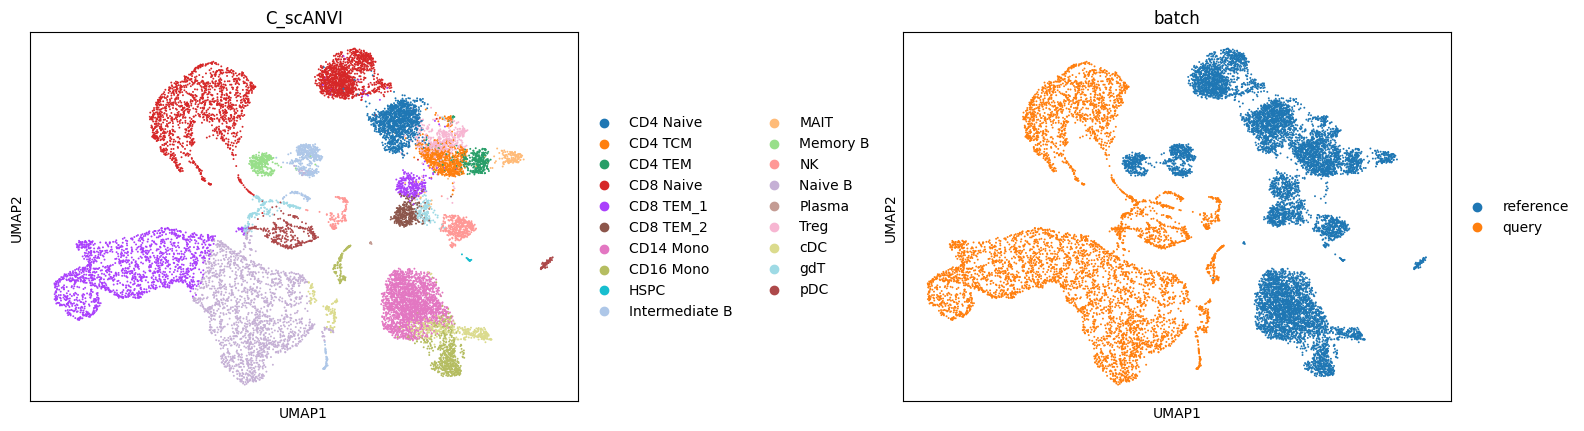

In [100]:
data.obs["C_scANVI"] = lvae.predict(data)
data.obsm["X_scANVI"] = lvae.get_latent_representation(data)
sc.pp.neighbors(data, use_rep="X_scANVI")
sc.tl.umap(data)
sc.pl.umap(data, color=['C_scANVI', "batch"], wspace=0.45)

In [101]:
data

AnnData object with n_obs × n_vars = 15437 × 19502
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'C_scANVI_colors', 'batch_colors'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [119]:
data.obs['cell_type'] = data.obs['C_scANVI']

In [126]:
data.obs

,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi,C_scANVI
AAACAGCCAATCCCTT-1_reference,CD4 TCM,reference,0,3,CD4 TCM,CD4 TCM
AAACAGCCAATGCGCT-1_reference,CD4 Naive,reference,0,2,CD4 Naive,CD4 Naive
AAACAGCCACCAACCG-1_reference,CD8 Naive,reference,0,5,CD8 Naive,CD8 Naive
AAACAGCCAGGATAAC-1_reference,CD4 Naive,reference,0,2,CD4 Naive,CD4 Naive
AAACAGCCAGTTTACG-1_reference,CD4 TCM,reference,0,3,CD4 TCM,CD4 TCM
...,...,...,...,...,...,...
TTTGGGAACTGGTCCG_query,NK,query,1,19,Unknown,NK
TTTGGGATGCCTGCGA_query,Naive B,query,1,19,Unknown,Naive B
TTTGGGATGGCGGTTC_query,CD8 TEM_1,query,1,19,Unknown,CD8 TEM_1
TTTGGGATGTTAGCTG_query,Naive B,query,1,19,Unknown,Naive B


# Save predicted cell type labels back to the processed cell by bin matrix.
Required for Part III

In [120]:
# Extract index of elements
idx = data.obs[data.obs['batch'] == 'query'].index

In [121]:
filtered_data = data[idx, :]

In [127]:
filtered_data.obs.index = filtered_data.obs.index.str.replace('_query', '')

<ipython-input-127-c261fe76f7de>:1: ImplicitModificationWarning:

Trying to modify index of attribute `.obs` of view, initializing view as actual.



In [178]:
filtered_data

AnnData object with n_obs × n_vars = 5806 × 19502
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'C_scANVI_colors', 'batch_colors'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [129]:
filtered_data.obs

/usr/local/lib/python3.11/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi,C_scANVI
AAACAACGAACGAGCA,cDC,query,1,19,Unknown,cDC
AAACAACGAAGAGGCT,CD8 TEM_1,query,1,19,Unknown,CD8 TEM_1
AAACAACGAAGTCGGA,CD8 TEM_1,query,1,19,Unknown,CD8 TEM_1
AAACAACGAGAAGGCT,CD8 Naive,query,1,19,Unknown,CD8 Naive
AAACAACGAGTACGTT,Naive B,query,1,19,Unknown,Naive B
...,...,...,...,...,...,...
TTTGGGAACTGGTCCG,NK,query,1,19,Unknown,NK
TTTGGGATGCCTGCGA,Naive B,query,1,19,Unknown,Naive B
TTTGGGATGGCGGTTC,CD8 TEM_1,query,1,19,Unknown,CD8 TEM_1
TTTGGGATGTTAGCTG,Naive B,query,1,19,Unknown,Naive B


In [123]:
data

AnnData object with n_obs × n_vars = 15437 × 19502
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'C_scANVI_colors', 'batch_colors'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [174]:
query = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad')

In [177]:
query

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'TSS_profile', 'doublet_rate', 'frac_overlap_TSS', 'frag_size_distr', 'library_tsse', 'reference_sequences', 'scrublet_sim_doublet_score', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'
    obsp: 'distances'

In [179]:
query.obs['cell_type'] = filtered_data.obs['cell_type']

In [180]:
query.obs

,n_fragment,frac_dup,frac_mito,tsse,doublet_probability,doublet_score,leiden,cell_type
AAACAACGAACGAGCA,20669,0.499952,0.000097,24.820937,0.054941,0.045568,6,cDC
AAACAACGAAGAGGCT,13418,0.492556,0.000819,23.527197,0.066620,0.011765,4,CD8 TEM_1
AAACAACGAAGTCGGA,17326,0.501367,0.000058,18.286915,0.065113,0.013841,3,CD8 TEM_1
AAACAACGAGAAGGCT,14460,0.536803,0.000069,29.606659,0.070266,0.007353,0,CD8 Naive
AAACAACGAGTACGTT,12117,0.589485,0.000083,20.882088,0.060470,0.021739,6,Naive B
...,...,...,...,...,...,...,...,...
TTTGGGAACTGGTCCG,14219,0.550441,0.000070,26.537963,0.069208,0.008556,7,NK
TTTGGGATGCCTGCGA,17285,0.443880,0.000116,17.215343,0.069208,0.008556,2,Naive B
TTTGGGATGGCGGTTC,16380,0.522847,0.000244,22.642094,0.069736,0.007949,1,CD8 TEM_1
TTTGGGATGTTAGCTG,12473,0.525001,0.000000,20.014964,0.074034,0.003460,2,Naive B


In [181]:
query.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed_annotated.h5ad')

# Part III - Identify differentially accessible regions

# Load annotated CBB matrix

In [182]:
data = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed_annotated.h5ad')

In [183]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_type'
    var: 'count', 'selected'
    uns: 'TSS_profile', 'doublet_rate', 'frac_overlap_TSS', 'frag_size_distr', 'library_tsse', 'reference_sequences', 'scrublet_sim_doublet_score', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'
    obsp: 'distances'

In [ ]:
sc.pp.scale(data, max_value = 10)
sc.pp.pca(data, svd_solver = 'arpack')
sc.pp.neighbors(data, n_neighbors=10, n_pcs=40)
sc.tl.umap(data)
sc.tl.leiden(data)

In [ ]:
data

In [ ]:
snap.pl.umap(data, color='cell_type', interactive=False)

In [ ]:
snap.tl.macs3(data, groupby='cell_type')